In [ ]:
#соклько авокадо было продано к концу каждой недели (данные изначально недельные) в NewYork и LosAngeles.

select 
    Region,
    Date,
    total_volume,
    sum(total_volume) OVER w as volume
from avocado
where Region in ('NewYork', 'LosAngeles')
    and type ='organic'
window w as(
    partition by region
    order by date
    )
order by region desc, date
limit 10

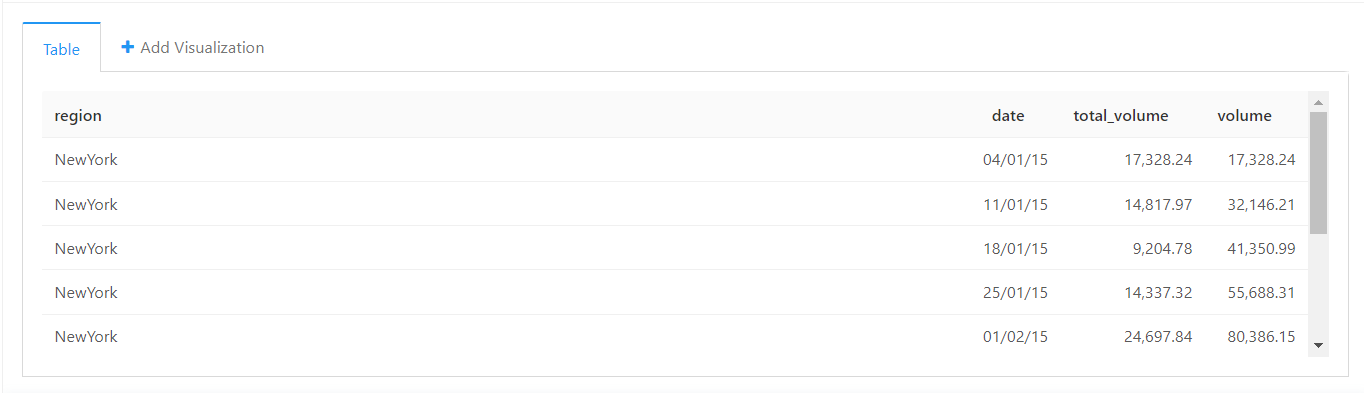

In [ ]:
#сравнить уровни падения недельных продаж по сравнению с предыдущей неделей (данные недельные изначально)

select 
    date,
    total_volume,
    Region,
    type,
    total_volume - lag(total_volume, 1) OVER w as diff
from avocado
where Region in ('TotalUS')
    and type ='conventional'
window w as()



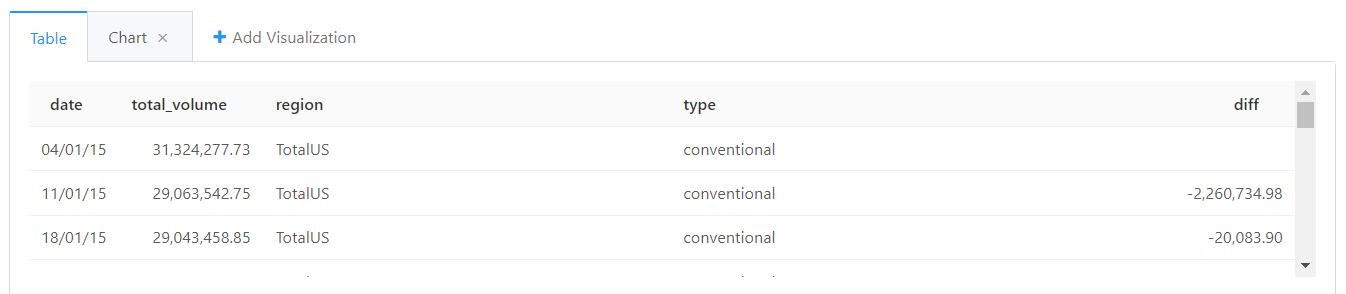

In [ ]:
# Создайте колонку с разницей объемов продаж за неделю и за неделю до этого для каждого типа авокадо. 
#Найдите день, когда продажи авокадо типа organic увеличились по сравнению с предыдущей неделей, 
#а conventional – наоборот упали.

select 
    date,
    total_volume,
    Region,
    type,
    total_volume - lag(total_volume, 1) OVER w as diff
from avocado
where Region in ('NewYork')
    and extract(year from date) = '2018'
window w as(
    partition by type
    )


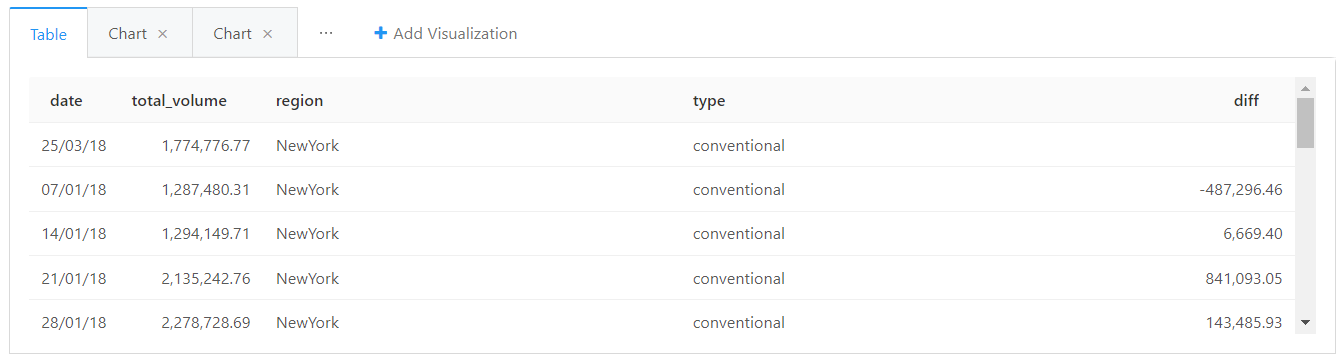

In [ ]:
#найти скользящее среднее цены за текущую неделю и 2 предыдущие
select 
    date,
    total_volume,
    type,
    avg(average_price) OVER w as diff
from avocado
where region = 'NewYork'
window w as(
    partition by type
    order by date
    ROWS BETWEEN 2 PRECEDING and current row
    )

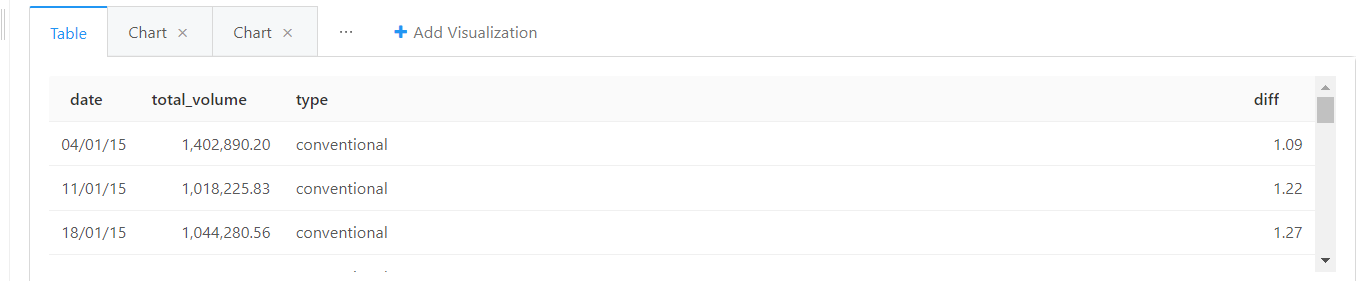